# Build a Binary Classification Model


**Target:** Is the delivery "Late" (1) or "On Time" (0)?

Before using complex algorithms, we need a baseline model to compare against. A simple baseline is the "Majority Class" classifier, which always predicts the most frequent outcome.

_Why?_ If 90% of deliveries are on time, a model with 90% accuracy might actually be doing nothing more than guessing "on time" every time. We have checked this baseline in the previous section and found that the majority class is "Delayed" at around 58%. So, our baseline model would predict "Delayed" for every delivery, giving us an accuracy of about 58%.


## Install and Import Libraries


:::{important} Required packages

You will need scikit-learn, xgboost, and plotnine to run the code in this notebook. You can install them using pip or conda:

**Using pip:**

```bash
pip install scikit-learn xgboost plotnine
```

**Using conda:**

```bash
conda install -c conda-forge scikit-learn py-xgboost plotnine
```

:::


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score,
)

import xgboost
from xgboost import XGBClassifier

Check XGBoost version.


In [2]:
print(f"xgboost version: {xgboost.__version__}")

xgboost version: 3.1.3


## Load Data


In [3]:
df = pd.read_csv(
    "http://raw.githubusercontent.com/bdi593/datasets/main/amazon-on-time-delivery-data/on-time-delivery-data.csv"
)
df

,zipcode,total_items,precipitation_rate,water_runoff,snow_depth,temperature,temperature_at_1500m,min_temperature,max_temperature,pressure,wind_gust_speed,total_cloud_cover,dew_point_temperature,relative_humidity,wind_speed,classification_ontime
0,2719,518.0,0.0,1.80,0.0,2.24,-5.41,-3.32,4.36,102949.50,9.09,80.5,-2.44,71.58,4.892280,Delayed
1,92545,969.0,0.0,0.40,0.0,12.17,6.87,4.76,19.41,94921.35,3.16,0.0,-6.60,28.81,2.376716,Delayed
2,27357,216.0,0.0,2.05,0.0,5.30,0.92,0.41,11.21,98834.30,8.92,92.5,0.63,73.53,3.213254,On time
3,81211,402.0,0.0,0.13,0.0,-0.28,10.12,-3.24,5.16,70768.17,6.00,16.0,-5.72,67.84,3.751669,Delayed
4,67220,246.0,0.0,0.04,0.0,11.71,7.29,5.90,17.24,96777.72,15.99,5.0,5.49,66.28,9.623910,On time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,11030,1228.0,0.0,0.00,0.0,5.64,2.97,3.52,6.85,101938.50,4.95,99.7,4.41,91.97,2.923090,Delayed
44996,63119,1627.0,0.0,6.10,0.0,8.46,2.25,3.33,14.21,100249.50,4.87,0.0,-1.65,51.47,2.134497,Delayed
44997,21032,496.0,0.0,2.14,0.0,3.53,-6.77,0.81,7.60,101679.00,7.78,5.7,-4.97,54.33,4.524221,Delayed
44998,95315,189.0,0.0,0.44,0.0,5.51,-2.32,-0.53,10.88,102243.50,2.73,15.7,-6.38,42.74,2.177973,On time


## Preprocess Data for Modeling


### Select Features and Target


In [4]:
X = df.drop(columns=["classification_ontime"])
y = df["classification_ontime"]

### Encode Target Variable to Integer


In [5]:
le = LabelEncoder()
y = le.fit_transform(y)

print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Delayed': np.int64(0), 'On time': np.int64(1)}


### Split Data into Train and Test Sets

The `random_state` parameter ensures that the split is reproducible, meaning you will get the same train and test sets every time you run the code. This is important for consistency when evaluating model performance. `42` is a commonly used value for `random_state`, but you can choose any integer.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Build Classifier


In [7]:
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
)

xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


#### The Inputs

- `X`: Your feature matrix (independent variables).
  - Example: zipcode, total_items,
- `y`: Your target variable (dependent variable).
  - `"classification_ontime"`

#### The Arguments

- `test_size=0.2`: 20% of the data goes into the test set, and the remaining 80% goes into the training set
  - Since we have 45,000 rows, this means:
    - 36,000 rows for training
    - 9,000 rows for testing
- `random_state=42`: Controls randomness.
  - Ensures the split is reproducible
  - If someone else runs this code with `random_state=42`, they get the same split
  - The number 42 is arbitrary (it's just a seed), although it's a popular choice in the data science community.
- `stratify=y`: Ensures that the class distribution in the train and test sets is the same as in the original dataset.
  - Example: If your original dataset has:
    - 70% class 0
    - 30% class 1
  - Then both training and test sets will also have:
    - 70% class 0
    - 30% class 1
  - Without stratification, you might get an imbalanced split.
  - ⚠️ Only use `stratify=y` for classification tasks (not regression).

#### Outputs

The function returns 4 objects:

| Variable  | Meaning               |
| --------- | --------------------- |
| `X_train` | Features for training |
| `X_test`  | Features for testing  |
| `y_train` | Labels for training   |
| `y_test`  | Labels for testing    |


## Check Model Performance


After training the XGBoost model (`xgb_model`) on the training data, we use the test data (`X_test`) to generate predictions.


In [8]:
y_pred = xgb_model.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 0, 1], shape=(9000,))

Instead of returning class labels, `predict_proba()` returns **probabilities**.


In [9]:
y_proba = xgb_model.predict_proba(X_test)[:, 1]
y_proba

array([0.95800394, 0.9214918 , 0.08678827, ..., 0.07275838, 0.49091452,
       0.5704661 ], shape=(9000,), dtype=float32)

$$
If P(class=1)≥0.5→predict 1 If P(class=1)<0.5→predict 0\text{If } P(\text{class}=1) < 0.5 \rightarrow \text{predict } 0If P(class=1)<0.5→predict 0
$$


In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8265555555555556


In [11]:
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

ROC-AUC: 0.9080099123651827


In [12]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[4361  867]
 [ 694 3078]]


In [13]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      5228
           1       0.78      0.82      0.80      3772

    accuracy                           0.83      9000
   macro avg       0.82      0.83      0.82      9000
weighted avg       0.83      0.83      0.83      9000



After training the XGBoost classifier on the delivery dataset, we evaluate performance using several standard classification metrics.

Because this is a binary classification problem, no single metric tells the full story. Instead, we interpret accuracy, precision, recall, F1-score, and ROC-AUC together.


## Check Feature Importance


In [14]:
importances = xgb_model.feature_importances_
features = X.columns

df_feat_imp = pd.Series(importances, index=features).sort_values().reset_index()

df_feat_imp.columns = ["feature", "importance"]
df_feat_imp["importance_pct"] = df_feat_imp["importance"] * 100

df_feat_imp

,feature,importance,importance_pct
0,precipitation_rate,0.000000,0.000000
1,relative_humidity,0.017903,1.790255
2,total_cloud_cover,0.018370,1.836967
3,water_runoff,0.019689,1.968941
4,wind_gust_speed,0.020641,2.064130
5,wind_speed,0.021190,2.118979
6,temperature_at_1500m,0.025030,2.503026
7,pressure,0.029028,2.902781
8,zipcode,0.032042,3.204241
9,min_temperature,0.033344,3.334359


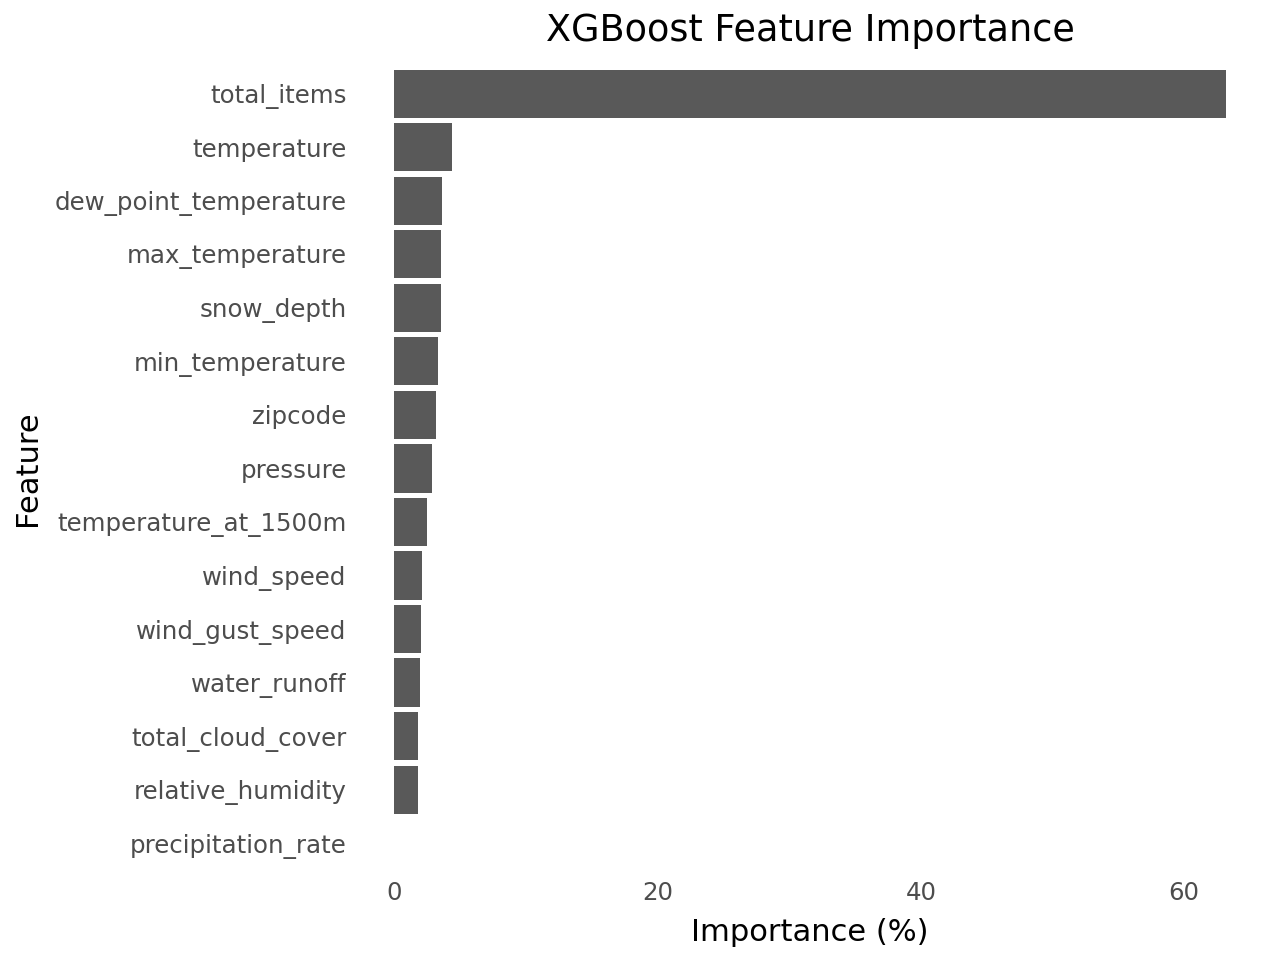

In [15]:
from plotnine import (
    ggplot,
    aes,
    geom_col,
    coord_flip,
    labs,
    theme_minimal,
    theme,
    element_blank,
)

(
    ggplot(df_feat_imp, aes(x="reorder(feature, importance_pct)", y="importance_pct"))
    + geom_col()
    + coord_flip()
    + labs(title="XGBoost Feature Importance", x="Feature", y="Importance (%)")
    + theme_minimal()
    + theme(panel_grid_major=element_blank(), panel_grid_minor=element_blank())
)

:::{important} Why does `"total_items"` have such high feature importance?

One surprising result from the gradient-boosted model was that the variable `"total_items"` accounts for nearly 63% of total feature importance.

At first glance, this may seem unusually high. However, there are several possible explanations.

From a logistics perspective, the number of items in an order can strongly influence delivery performance:

- More items may require longer picking and packing time.
- Larger orders may require larger or heavier packaging.
- Complex orders increase warehouse handling complexity.
- Bulk orders may experience fulfillment bottlenecks during peak periods.

It is important to distinguish between:

- **Predictive importance** (useful for forecasting), and
- **Causal influence** (driving the outcome).

Even if `"total_items"` is highly predictive, it does not necessarily mean that increasing the number of items directly causes delays. It may be:

- A proxy for order complexity,
- A proxy for warehouse congestion,
- A signal of high-demand periods,
- Correlated with geographic or seasonal patterns.

Models detect patterns, not causal mechanisms.

:::
